# 2. Logic Regression
## 2.1 Logic regression with one variable
In this part of the exercise, you will build a **logistic regression** model to predict **whether** a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 

You have historical data from previous applicants that you can use as a training set for logistic regression. 
For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. This outline and the framework code in ex2.m will guide you through the exercise.


### 2.1.1 Visualizing the data

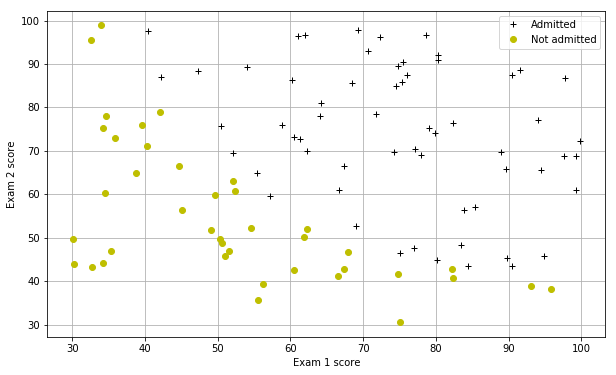

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fname = "data/ex2data1.txt"
cols = np.loadtxt(fname, delimiter=',', unpack='True')

X = cols[:1]
Y = cols[1:2]
Z = cols[2:]
m = Y.size
X = np.array(X).reshape(m,1)
Y = np.array(Y).reshape(m,1)
Z = np.array(Z).reshape(m,1)
L = np.hstack((X,Y,Z)) # 坐标 
#print L

admitted,notadmitted = [],[]
for x in L:
    if x[2] == 1:
        admitted.append(x)
    else:
        notadmitted.append(x)
admitted = np.array(admitted)
notadmitted= np.array(notadmitted)
plt.figure(figsize=(10,6))
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.plot(admitted[:,0],admitted[:,1],'k+',label='Admitted')
plt.plot(notadmitted[:,0],notadmitted[:,1],'yo',label='Not admitted')
plt.legend()
plt.grid(True)

In [11]:
def h(mytheta,myX):
    return g(np.dot(myX,mytheta))

from scipy.special import expit #Vectorized sigmoid function
def g(z):
    return expit(z)

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,Y)

0.6931471805599541